# colab 튜토리얼 by 백지오
## colab 기본
- colab에는 `코드셀`과 `텍스트셀`이 존재합니다.
- 현재 본 텍스트가 작성되어 있는 영역은 `텍스트셀`입니다.
- `Markdown`문법을 활용해 메모를 작성할 수 있습니다.
- `코드셀`에서는 아래와 같이 `Python`코드를 작성하고, 결과를 확인할 수 있습니다.

In [1]:
print("Hello Colab!")

Hello Colab!


## 간단한 머신러닝 실습하기
- colab에는 기본적인 머신러닝 라이브러리가 설치되어 있습니다.
- 코드셀에 코드를 작성해 간단한 머신러닝 실습을 진행해봅시다.

### MNIST 데이터 불러오기
- MNIST는 손으로 쓴 숫자 이미지 데이터셋입니다.
- 0 ~ 9 의 값을 갖는 28 $\times$ 28 크기 이미지로 구성되어 있습니다.

In [4]:
from sklearn.datasets import fetch_openml # 데이터셋을 다운받기 위한 라이브러리
mnist = fetch_openml('mnist_784') # 데이터셋 다운

print(mnist.data.shape)    # 이미지 데이터 크기
print(mnist.target.shape)  # 라벨(정답) 데이터 크기

(70000, 784)
(70000,)


### MNIST 데이터 들여다보기
- 데이터가 실제로 어떻게 생겼는지 살펴봅시다.
- 한 개의 데이터는 784 (28$\times$ 28) 크기의 벡터로 이루어져 있습니다.
- MNIST에는 7만개의 데이터가 담겨 있습니다.
- 데이터의 각 값은 0 ~ 255의 픽셀 값을 갖고 있습니다.

5


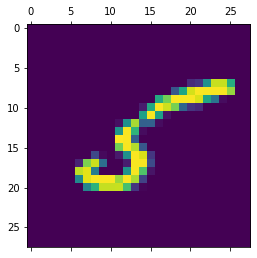

In [12]:
sample = mnist.data[11]         # 11번째 이미지 데이터
sample_label = mnist.target[11] # 11번째 라벨 데이터

import matplotlib.pyplot as plt # 이미지를 출력해주는 라이브러리
%matplotlib inline

sample_image = sample.reshape(28, 28) # 784차원 벡터를 28x28 행렬(이미지)로 변환해줍니다.

plt.imshow(sample_image) # 이미지를 출력 준비합니다.
print(sample_label)       # 이미지의 라벨을 출력합니다.
plt.show()                # 이미지를 출력합니다.

### SVM(서포트 벡터 머신)으로 MNIST 분류해보기
- 7만개의 데이터를 5만개의 학습 데이터와 2만개의 테스트 데이터로 나누어 SVM으로 분류해봅시다.
- SVM은 딥러닝 이전에 널리 쓰이던 머신러닝 모델입니다.

In [13]:
# 학습 데이터
x_train = mnist.data[:50000]
y_train = mnist.target[:50000]

# 테스트 데이터
x_test = mnist.data[50000:]
y_test = mnist.target[50000:]

In [14]:
import numpy as np                  # 행렬 처리를 위한 라이브러리
from sklearn.svm import LinearSVC   # svm 라이브러리

clf = LinearSVC(random_state=777)   # svm 초기화
clf.fit(x_train, y_train)           # svm 학습

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=777, tol=0.0001,
          verbose=0)

### 성능 평가하기
- 훈련한 SVM이 어느 정도의 성능을 보이는지, 테스트 데이터와 학습 데이터로 각각 평가해봅시다.

In [15]:
# 예측 수행
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score # 정확도 측정 라이브러리

train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)

print("학습 정확도:", train_acc)
print("테스트 정확도:", test_acc)

학습 정확도: 0.8915
테스트 정확도: 0.8897


### Q: 왜 학습 데이터와 테스트 데이터를 분리하나요?
- 위 평가 결과에서 알 수 있듯이, 보통 학습 정확도는 테스트 정확도보다 높게 나옵니다.
- 그 이유는, 학습 과정에서 데이터의 특징 (숫자의 모양, 특징 등)이 아닌 데이터 그 자체 (11번째 데이터는 5! 등)에 익숙해졌기 때문입니다.
- 이는 우리가 한 문제집을 계속 풀면, 아예 문제의 답을 외워버리는 것과 비슷합니다.
- 이러한 현상을 과적합<sup>Overfitting</sup>이라고 합니다.

# 부록: 결과 시각화 하기
- 우리 모델이 실제 예측한 값과 실제 정답 값을 비교하여 출력해봅시다.

정답
['8' '4' '8' '1' '5' '9' '4' '5' '7' '3']
예측
['8' '9' '8' '1' '5' '9' '4' '5' '7' '3']


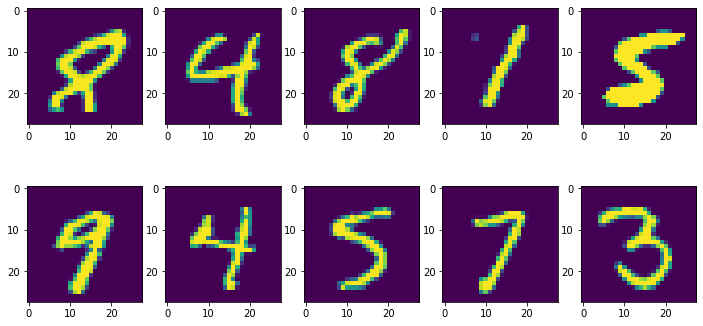

In [37]:
pick = np.random.randint(0, 20000, size=10) # 랜덤한 값 10개 추출

imgs = []
for i in pick:
    img = x_test[i]
    img = img.reshape(28, 28)
    imgs.append(img)

print('정답')
print(y_test[pick]) # 정답 출력
print('예측')
print(pred_test[pick])

fig = plt.figure(figsize=(12,6))

for i in range(1, 11):
    sub = fig.add_subplot(2, 5, i)
    sub.imshow(imgs[i-1])
